# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [29]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [2]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [3]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

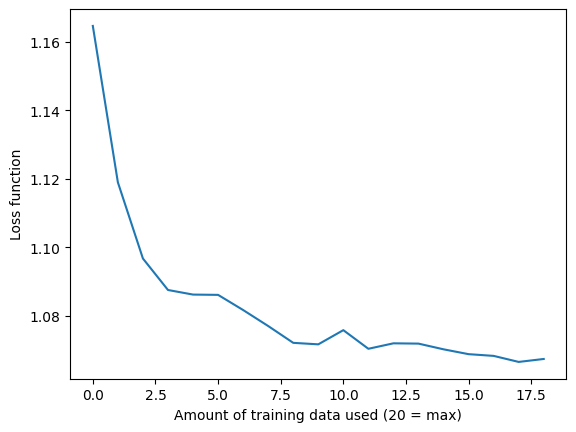

In [4]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [5]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

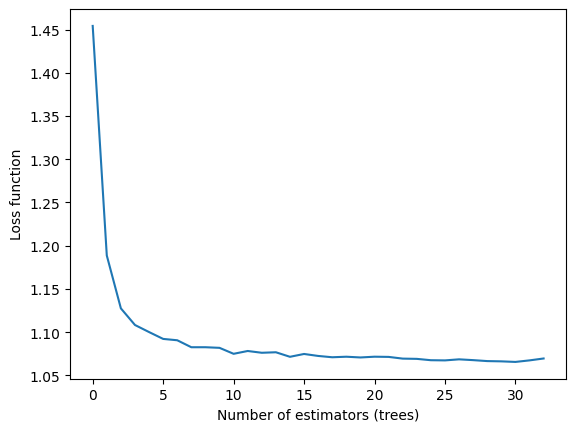

In [15]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

More training data is better for generalization and less overfitting ,however more estimators improve stability and accuraccy , if I was to trade I would prefer more training data , Ineed my model to generalizes better first.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

In [6]:
df_movies = pd.read_csv("https://raw.githubusercontent.com/Marara29/Module-B-semester-2/refs/heads/main/enhanced_box_office_data(2000-2024)u.csv")

In [22]:
df_movies['Rating'] = df_movies['Rating'].astype(str).str.extract(r'([\d.]+)').astype(float)
df_clean = df_movies.dropna(subset=['Rating', 'Vote_Count', '$Worldwide', '$Domestic', '$Foreign'])
numeric_cols = df_clean.select_dtypes(include=[np.number])
X = numeric_cols.drop(columns='$Worldwide')
y= numeric_cols['$Worldwide']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(random_state=42)

cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')

array([0.99792709, 0.99386114, 0.96866859, 0.99774294, 0.99805612])

In [28]:
cv_scores
np.mean(cv_scores)

np.float64(0.9912511771002839)

In [ ]:

param_dist = {
        'n_estimators': [50, 100],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 3]
    }
search = RandomizedSearchCV(
        rf, param_distributions=param_dist, 
        n_iter=5, cv=5, scoring='r2', random_state=42, n_jobs=-1
    )
search.fit(X_train, y_train)
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
correlation = np.corrcoef(y_test, y_pred)[0, 1]


# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

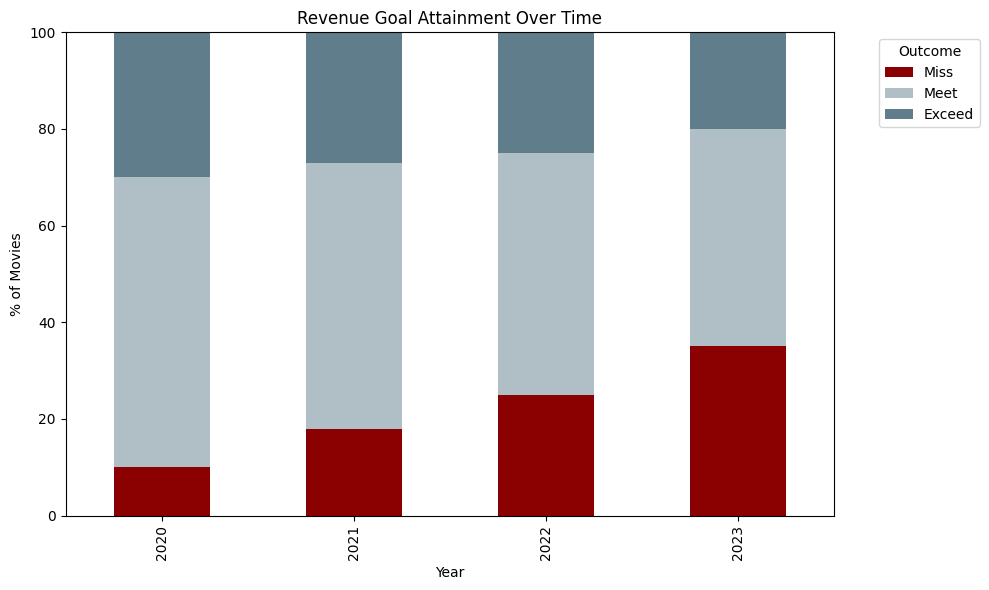

In [35]:
years = ['2020', '2021', '2022', '2023']
data2 = {
    'Year': years,
    'Miss': [10, 18, 25, 35],
    'Meet': [60, 55, 50, 45],
    'Exceed': [30, 27, 25, 20]
}
df2 = pd.DataFrame(data2)

df2.set_index('Year').plot(kind='bar', stacked=True, figsize=(10, 6),
                           color=['#8B0000', '#B0BEC5', '#607D8B'])

plt.title("Revenue Goal Attainment Over Time")
plt.ylabel("% of Movies")
plt.ylim(0, 100)
plt.legend(title="Outcome", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()